# Statistical Analysis Server-side Data

In [1]:
pwd

'/Users/nil/Roskilde Universitet/Sustainable IT - Master thesis Spring 2022 - Documents/General/Experiment/JupyterNotebooks'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import math
from scipy import stats

In [3]:
#data import
dataDir = '/Users/nil/Roskilde Universitet/Sustainable IT - Master thesis Spring 2022 - Documents/General/Experiment/Data/Exported/AreasServer'
experimentData1 = pd.read_csv(dataDir + '/experiment1AreaCollected.csv', sep=',', decimal= '.')
experimentData2 = pd.read_csv(dataDir + '/experiment2AreaCollected.csv', sep=',', decimal= '.')
experimentData3 = pd.read_csv(dataDir + '/experiment3AreaCollected.csv', sep=',', decimal= '.')
experimentData4 = pd.read_csv(dataDir + '/experiment4AreaCollected.csv', sep=',', decimal= '.')

experiment1 = np.array(experimentData1['areas'])
experiment2 = np.array(experimentData2['areas'])
experiment3 = np.array(experimentData3['areas'])
experiment4 = np.array(experimentData4['areas'])

# ANOVA
Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=μ3=μ4
Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal

In [4]:
## THE QUICK WAY
stat, p = stats.f_oneway(experiment1, experiment2, experiment3, experiment4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print('Exact value of P is: ' + str(p))

stat=408.785, p=0.000
Probably different distributions
Exact value of P is: 4.308977898105668e-71


In [5]:
experimentData1['experiment']='Experiment 1'
experimentData2['experiment']='Experiment 2'
experimentData3['experiment']='Experiment 3'
experimentData4['experiment']='Experiment 4'

pdList1 = [experimentData1, experimentData2, experimentData3, experimentData4]
areasCollected = pd.concat(pdList1, ignore_index=True)
areasCollected = areasCollected.drop(columns="runNumber")
areasCollected = areasCollected.drop(columns="Unnamed: 0")
areasCollected = areasCollected.drop(columns="index")
areasCollected['index']=list(range(len(areasCollected)))
areasCollected = areasCollected[['index', 'experiment', 'areas']]

pdList2 = [experimentData1, experimentData3, experimentData4]
areas1_3_4 = pd.concat(pdList2, ignore_index=True)
areas1_3_4 = areas1_3_4.drop(columns="runNumber")
areas1_3_4 = areas1_3_4.drop(columns="Unnamed: 0")
areas1_3_4 = areas1_3_4.drop(columns="index")
areas1_3_4['index']=list(range(len(areas1_3_4)))
areas1_3_4 = areas1_3_4[['index', 'experiment', 'areas']]

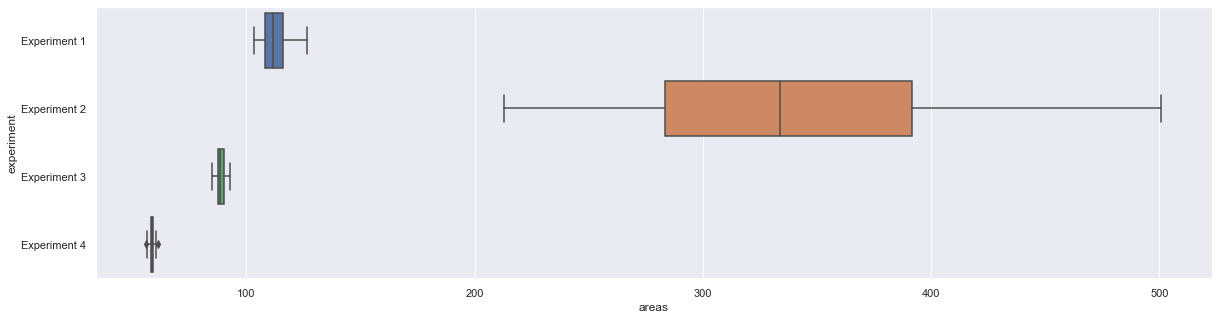

In [6]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=areasCollected, y='experiment' , x='areas')
plt.savefig('/Users/nil/Roskilde Universitet/Sustainable IT - Master thesis Spring 2022 - Documents/General/Experiment/Data/Charts/boplotAreas_compared_server.png')

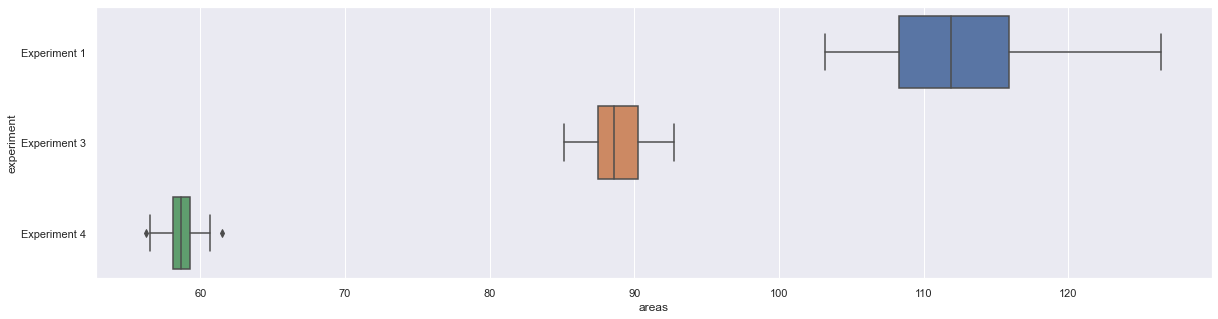

In [7]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=areas1_3_4, y='experiment' , x='areas')
plt.savefig('/Users/nil/Roskilde Universitet/Sustainable IT - Master thesis Spring 2022 - Documents/General/Experiment/Data/Charts/boplotAreas_compared1_3_4_server.png')

# T-TEST 

In [8]:
# get variance for all of them
[np.var(x, ddof=1) for x in [experiment1, experiment2, experiment3, experiment4]]

[27.99943330747545, 5958.4469190106765, 3.7750276848510564, 1.2659300420587898]

## Experiment 1 & 2
H0: the means of the samples are equal.<br>
H1: the means of the samples are unequal.

In [9]:
# check for equal variance. Low p-value means not equal variance
stat, p = stats.levene(experiment1, experiment2)
print('stat=%.3f, p=%.3f' % (stat, p))
print('exact p: ' + str(p)) 
# If low, perform Welch’s t-test, which does not assume equal population variance

stat=79.741, p=0.000
exact p: 1.3339159479185038e-13


In [10]:
# Student's t-test EXP1 & EXP2
stat, p = stats.ttest_ind(experiment1, experiment2, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print('Exact value of P is: ' + str(p))

stat=-18.432, p=0.000
Probably different distributions
Exact value of P is: 1.1968756855958271e-20


## Experiment 1 & 3
H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [11]:
# check for equal variance. Low p-value means not equal variance
stat, p = stats.levene(experiment1, experiment3)
print('stat=%.3f, p=%.3f' % (stat, p))
print('exact p: ' + str(p)) 
# If low, perform Welch’s t-test, which does not assume equal population variance

stat=22.839, p=0.000
exact p: 8.563353482533723e-06


In [12]:
# Student's t-test EXP1 & EXP3
from scipy.stats import ttest_ind
stat, p = ttest_ind(experiment1, experiment3, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print('Exact value of P is: ' + str(p))

stat=26.904, p=0.000
Probably different distributions
Exact value of P is: 8.018269126182878e-33


## Experiment 1 & 4
H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [13]:
# check for equal variance. Low p-value means not equal variance
stat, p = stats.levene(experiment1, experiment4)
print('stat=%.3f, p=%.3f' % (stat, p))
print('exact p: ' + str(p)) 
# If low, perform Welch’s t-test, which does not assume equal population variance

stat=39.323, p=0.000
exact p: 2.08588120832163e-08


In [14]:
# Student's t-test EXP1 & EXP4
from scipy.stats import ttest_ind
stat, p = ttest_ind(experiment1, experiment4, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print('Exact value of P is: ' + str(p))

stat=64.140, p=0.000
Probably different distributions
Exact value of P is: 3.388413163479982e-46


## Experiment 3 & 4
H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [15]:
# check for equal variance. Low p-value means not equal variance
stat, p = stats.levene(experiment3, experiment4)
print('stat=%.3f, p=%.3f' % (stat, p))
print('exact p: ' + str(p)) 
# If low, perform Welch’s t-test, which does not assume equal population variance

stat=10.066, p=0.002
exact p: 0.0022676557384425874


In [16]:
# Student's t-test EXP3 & EXP4
from scipy.stats import ttest_ind
stat, p = ttest_ind(experiment3, experiment4, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
print('Exact value of P is: ' + str(p))

stat=79.298, p=0.000
Probably different distributions
Exact value of P is: 5.495431907250281e-58
